In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sympy as sym
from scipy.stats import chi2
import scipy.optimize as spo

(a) Haga un dibujo para visualizar la caja sujeta a que la profundidad de la caja sea etiquetada por z.

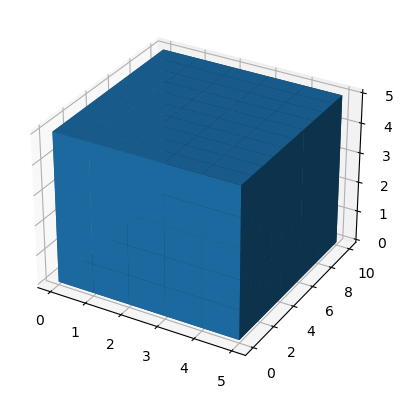

In [35]:
def Axs(z):
    A = [5, z, 5]
    return A
data = np.ones(Axs(10))
# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.voxels(data)
plt.show()

In [29]:
def Function(variables):
    x,y,z=variables
    return -x*y*z

def Function_g(variables):
    x,y,z=variables
    return x*y + 2*y*z + 2*x*z - 12

p0 = [1., 1., 1.]
cons = {'type': 'eq', 'fun': Function_g}

result = spo.minimize(Function, p0, constraints=cons)

#print(result)
print('El máximo es: ', np.round(result['fun'],3))

El máximo es:  -4.0


In [30]:
def Get_Vol(V):
    x,y,z = V
    return x*y*z
print('El volumen máximo que el usuario podrá guardar en la caja es: ', np.round(Get_Vol(result['x']),2))

El volumen máximo que el usuario podrá guardar en la caja es:  4.0


In [33]:
x, y, z, l = sym.symbols('x, y, z, l')
freal = x*y*z
Function = -x*y*z
dx = sym.diff(f, x)
dy = sym.diff(f, y)
dz = sym.diff(f, z)

grad_f = sym.Matrix([f]).jacobian(sym.Matrix(list(Function.free_symbols)))
g = x*y + 2*y*z + 2*x*z - 12

dgx = sym.diff(g, x)*l
dgy = sym.diff(g, y)*l
dgz = sym.diff(g, z)*l

grad_g = sym.Matrix([g]).jacobian(sym.Matrix(list(g.free_symbols)))
Matriz_S = [g,dx-dgx,dy-dgy,dz-dgz]
Sol = sym.solve(Matriz_S, [x, y,z,l], dict=True)

print('Con multiplicadores de lagrange la solución es: ', soluciones[0])

values=list(soluciones[0].values())
print('Con lo obtenido entonces el volumen máximo es: ', freal.subs({x:values[1], y:values[2],z:values[3]}))

Con multiplicadores de lagrange la solución es:  {l: -1/2, x: 2, y: 2, z: 1}
Con lo obtenido entonces el volumen máximo es:  4
